In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('./data/data_w_genres.csv')
print(df.shape)
df.head()

(32539, 16)


,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,31.538462,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.571429,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.407407,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,42.000000,5,1,7,[]


In [3]:
# no nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32539 entries, 0 to 32538
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           32539 non-null  object 
 1   acousticness      32539 non-null  float64
 2   danceability      32539 non-null  float64
 3   duration_ms       32539 non-null  float64
 4   energy            32539 non-null  float64
 5   instrumentalness  32539 non-null  float64
 6   liveness          32539 non-null  float64
 7   loudness          32539 non-null  float64
 8   speechiness       32539 non-null  float64
 9   tempo             32539 non-null  float64
 10  valence           32539 non-null  float64
 11  popularity        32539 non-null  float64
 12  key               32539 non-null  int64  
 13  mode              32539 non-null  int64  
 14  count             32539 non-null  int64  
 15  genres            32539 non-null  object 
dtypes: float64(11), int64(3), object(2)
memo

In [4]:
# check for duplicates
print(df.duplicated().sum())


0


### Numerical variables

In [9]:
num_vars = df.select_dtypes(include=np.number).columns
cat_vars = ['key', 'mode']
cont_vars = [column for column in num_vars if column not in cat_vars]

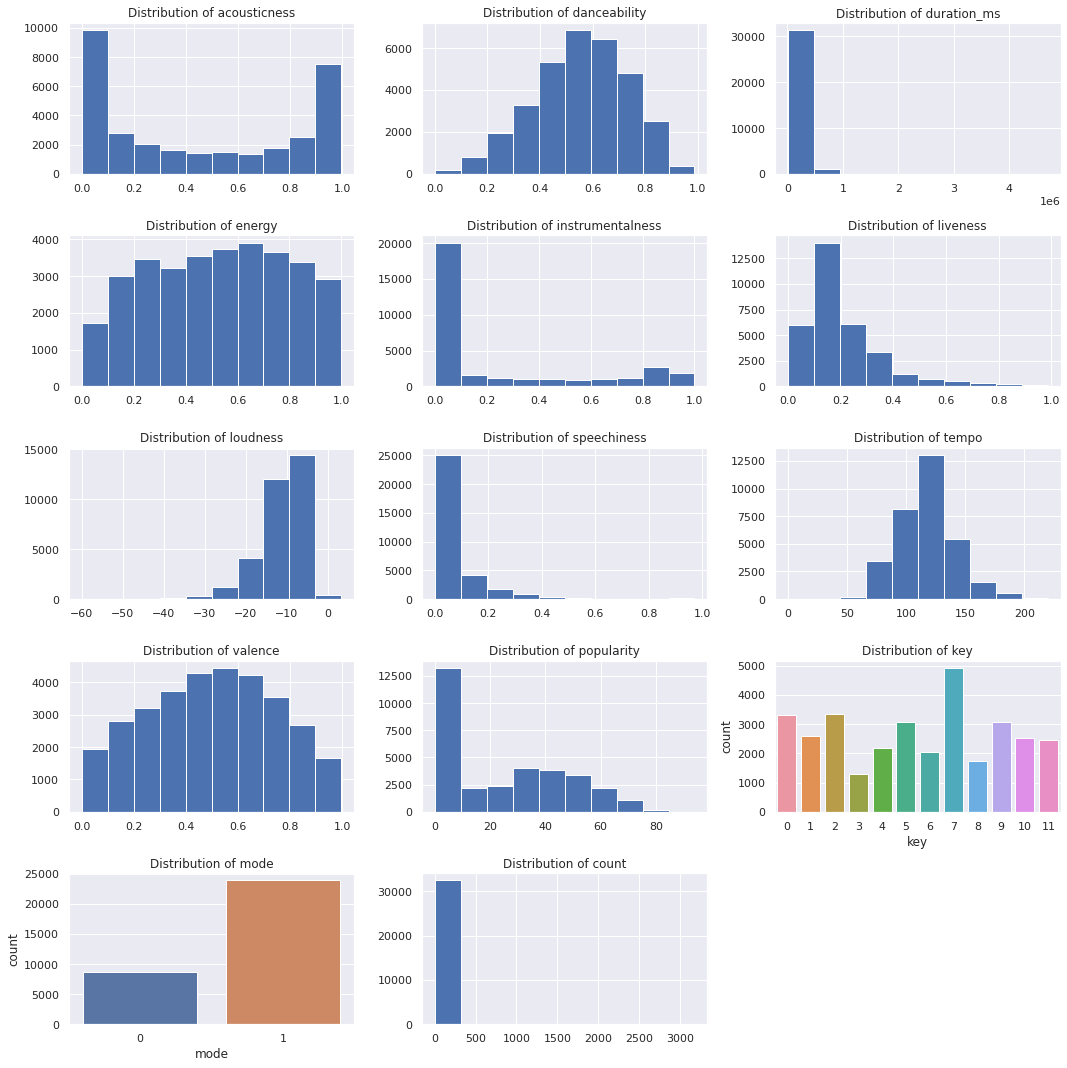

In [21]:
# Plot the distributions
n_cols = 3
n_rows = int(np.ceil(len(num_vars)/ n_cols))

fig = plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_vars):

    # make the plots
    ax = fig.add_subplot(n_rows,n_cols,i + 1)
    if variable in cont_vars:
        ax.hist(df[variable])
    else:
        sns.countplot(x=variable, data=df, ax=ax)
    
    plt.title(f'Distribution of {variable}')
    
plt.tight_layout()

In [22]:
#correlation
correlation = df.corr()
correlation.style.background_gradient(cmap='coolwarm')

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
acousticness,1.000000,-0.424457,-0.105510,-0.812479,0.052731,0.007735,-0.630304,0.006280,-0.309368,-0.131148,-0.233738,-0.051619,0.163035,0.045656
danceability,-0.424457,1.000000,-0.017983,0.373747,-0.144439,-0.128974,0.442657,0.228174,0.130781,0.517621,0.107888,0.043218,-0.110953,-0.034763
duration_ms,-0.105510,-0.017983,1.000000,0.050462,0.157470,-0.032482,-0.031587,0.005818,0.003820,-0.184973,-0.068137,0.012278,-0.052430,-0.018266
energy,-0.812479,0.373747,0.050462,1.000000,-0.067007,0.119412,0.790035,0.026715,0.348772,0.286840,0.136728,0.050529,-0.150864,-0.055233
instrumentalness,0.052731,-0.144439,0.157470,-0.067007,1.000000,-0.063504,-0.281833,-0.150203,-0.019954,-0.269772,-0.312031,0.007551,-0.074406,-0.016390
liveness,0.007735,-0.128974,-0.032482,0.119412,-0.063504,1.000000,0.060134,0.169815,-0.009518,-0.007754,-0.117807,-0.014149,0.009593,0.006850
loudness,-0.630304,0.442657,-0.031587,0.790035,-0.281833,0.060134,1.000000,0.008091,0.288241,0.338117,0.161599,0.035078,-0.096216,-0.049766
speechiness,0.006280,0.228174,0.005818,0.026715,-0.150203,0.169815,0.008091,1.000000,-0.024738,0.086492,-0.036463,0.014483,-0.029047,0.031344
tempo,-0.309368,0.130781,0.003820,0.348772,-0.019954,-0.009518,0.288241,-0.024738,1.000000,0.148581,0.036787,0.011855,-0.043904,-0.013547
valence,-0.131148,0.517621,-0.184973,0.286840,-0.269772,-0.007754,0.338117,0.086492,0.148581,1.000000,0.097568,0.029428,0.009047,0.008219


### Non-numerical variables

In [23]:
nonnum_vars = df.select_dtypes(exclude=np.number).columns
nonnum_vars

Index(['artists', 'genres'], dtype='object')

The columns *artists* and *genre* are strings (*genre* is not a list!):

In [24]:
genre_first_row = df['genres'][0]
artists_first_row = df['artists'][0]
print(f'type of genre column: {type(genre_first_row)}')
print(f'type of artists column: {type(artists_first_row)}')

type of genre column: <class 'str'>
type of artists column: <class 'str'>


In [25]:
# do we have duplicated artists?
df.artists.duplicated().sum()

0

In [26]:
# let's tokenize the genres
def tokenize_str(text):
    regex_rule = re.compile("[ '\"\[\]]")
    text = re.sub(regex_rule, "", text)
    return text.split(",")

In [27]:
df['genres'].apply(tokenize_str)

0               [showtunes]
1                        []
2                        []
3                        []
4                        []
                ...        
32534                    []
32535                    []
32536                    []
32537                    []
32538    [classickoreanpop]
Name: genres, Length: 32539, dtype: object

# Data by year

In [28]:
df_by_year = pd.read_csv('./data/data_by_year.csv')
print(df_by_year.shape)
df_by_year.head()

(102, 14)


,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1920,0.631242,0.515750,238092.997135,0.418700,0.354219,0.216049,-12.654020,0.082984,113.226900,0.498210,0.610315,2,1
1,1921,0.862105,0.432171,257891.762821,0.241136,0.337158,0.205219,-16.811660,0.078952,102.425397,0.378276,0.391026,2,1
2,1922,0.828934,0.575620,140135.140496,0.226173,0.254776,0.256662,-20.840083,0.464368,100.033149,0.571190,0.090909,5,1
3,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.205405,0,1
4,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10,1


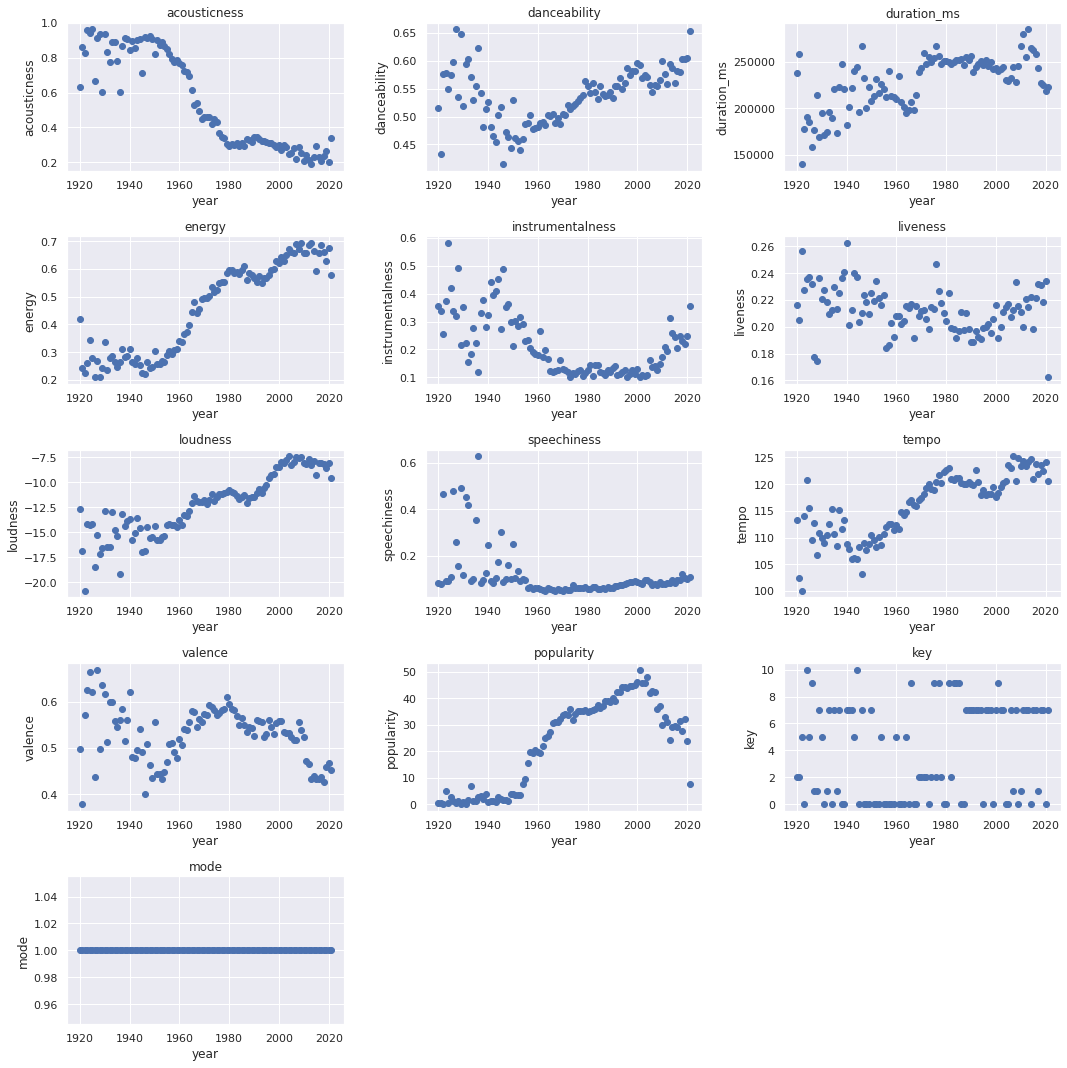

In [32]:
# Plot the variables against year
variables = df_by_year.drop('year', axis=1).columns
variables

n_cols = 3
n_rows = int(np.ceil(len(variables)/ n_cols))

fig = plt.figure(figsize=(15, 15))

for i, variable in enumerate(variables):

    # make the plots
    ax = fig.add_subplot(n_rows,n_cols,i + 1)
    ax.scatter(df_by_year['year'], df_by_year[variable])
    ax.set(xlabel='year', ylabel=variable)
    plt.title(f'{variable}')
    
plt.tight_layout()